# Signal Processing Lab №10
Voice Processing

In [16]:
import os

import numpy as np
import pandas as pd

import scipy.signal as sig
from scipy.io import wavfile

import librosa.display
import librosa

from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib

In [2]:
a_sound = wavfile.read('input/aaaa_sound.wav')
i_sound = wavfile.read('input/iiii_sound.wav')
gav_sound = wavfile.read('input/gav_gav_sound.wav')

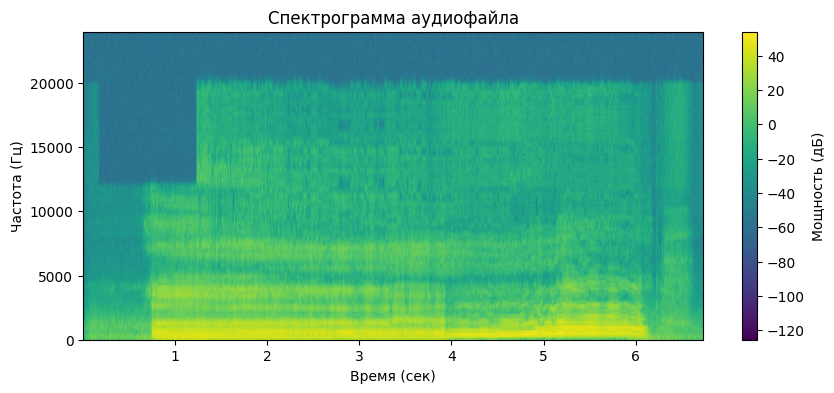

In [12]:
with np.errstate(divide='ignore'):
    plt.figure(figsize=(10, 4))
    a_spec = plt.specgram(a_sound[1], Fs=a_sound[0], window=matplotlib.mlab.window_hanning, cmap='viridis', scale='dB')
    plt.xlabel('Время (сек)')
    plt.ylabel('Частота (Гц)')
    plt.colorbar(label='Мощность (дБ)')
    plt.title('Спектрограмма аудиофайла')
    plt.savefig('output/a_spec.png')
    plt.show()

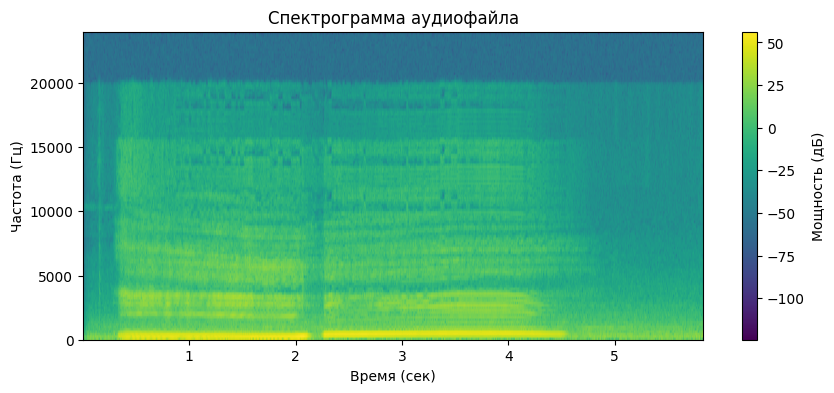

In [13]:
with np.errstate(divide='ignore'):
    plt.figure(figsize=(10, 4))
    i_spec = plt.specgram(i_sound[1], Fs=i_sound[0], window=matplotlib.mlab.window_hanning, cmap='viridis', scale='dB')
    plt.xlabel('Время (сек)')
    plt.ylabel('Частота (Гц)')
    plt.colorbar(label='Мощность (дБ)')
    plt.title('Спектрограмма аудиофайла')
    plt.savefig('output/i_spec.png')
    plt.show()

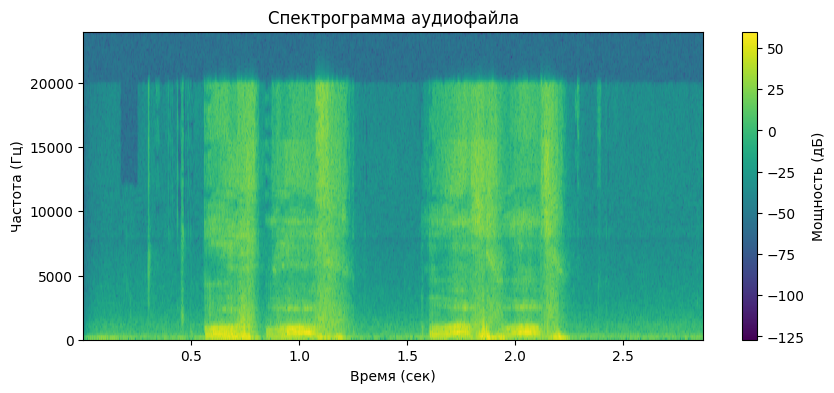

In [14]:
with np.errstate(divide='ignore'):
    plt.figure(figsize=(10, 4))
    gav_spec = plt.specgram(gav_sound[1], Fs=gav_sound[0], window=matplotlib.mlab.window_hanning, cmap='viridis', scale='dB')
    plt.xlabel('Время (сек)')
    plt.ylabel('Частота (Гц)')
    plt.colorbar(label='Мощность (дБ)')
    plt.title('Спектрограмма аудиофайла')
    plt.savefig('output/gav_spec.png')
    plt.show()

In [60]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

def find_formants(audio_file, window_size=0.025, hop_size=0.01):
    sr = audio_file[0]
    audio = audio_file[1].astype(np.float16)

    spectrogram = np.abs(librosa.stft(audio, hop_length=int(sr*hop_size), n_fft=int(sr*window_size)))
    formants = []
    for i in range(spectrogram.shape[1]):
        peaks, _ = find_peaks(spectrogram[:, i], height=np.max(spectrogram[:, i]) * 0.5, threshold=40)
        formants.append(peaks)

    return formants

def visualize_formants(audio_file, window_size=0.025, hop_size=0.01):
    sr = audio_file[0]
    audio = audio_file[1].astype(np.float16)

    spectrogram = np.abs(librosa.stft(audio, hop_length=int(sr*hop_size), n_fft=int(sr*window_size)))

    formants = find_formants(audio_file, window_size, hop_size)

    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, hop_length=int(sr*hop_size), x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')

    # for i, f in enumerate(formants):
    #     times = (i * hop_size) * np.ones_like(f)
    #     freqs = f * sr / len(spectrogram)
    #     plt.plot(times, freqs, marker='o', color='r', markersize=3, linestyle='None')

    all_formants = np.concatenate(formants)
    min_freq = np.min(all_formants) * sr / len(spectrogram)
    max_freq = np.max(all_formants) * sr / len(spectrogram)
    plt.axhline(y=min_freq, color='b', linestyle='--', linewidth=1, label='Минимальная частота голоса')
    plt.axhline(y=max_freq, color='g', linestyle='--', linewidth=1, label='Максимальная частота голоса')

    fundamental_tone = None
    max_overtones_count = 0
    for f in formants:
        overtones_count = len(f)
        if overtones_count > max_overtones_count:
            fundamental_tone = np.mean(f) * sr / len(spectrogram)
            max_overtones_count = overtones_count
    plt.axhline(y=fundamental_tone, color='m', linestyle='--', linewidth=1, label='Наиболее тембрально окрашенный основной тон')

    for i, f in enumerate(formants):
        times = (i * hop_size) * np.ones_like(f)
        freqs = f * sr / len(spectrogram)
        # plt.plot(times, freqs, marker='o', color='r', markersize=3, linestyle='None')

        sorted_indices = np.argsort(freqs)
        top_formants = sorted_indices[-3:]
        top_times = np.ones_like(top_formants) * (i * hop_size)
        top_freqs = freqs[top_formants]
        plt.plot(top_times, top_freqs, marker='o', color='g', markersize=3, linestyle='None')

    plt.title('Spectrogram with Formants')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.legend()
    plt.tight_layout()
    plt.show()

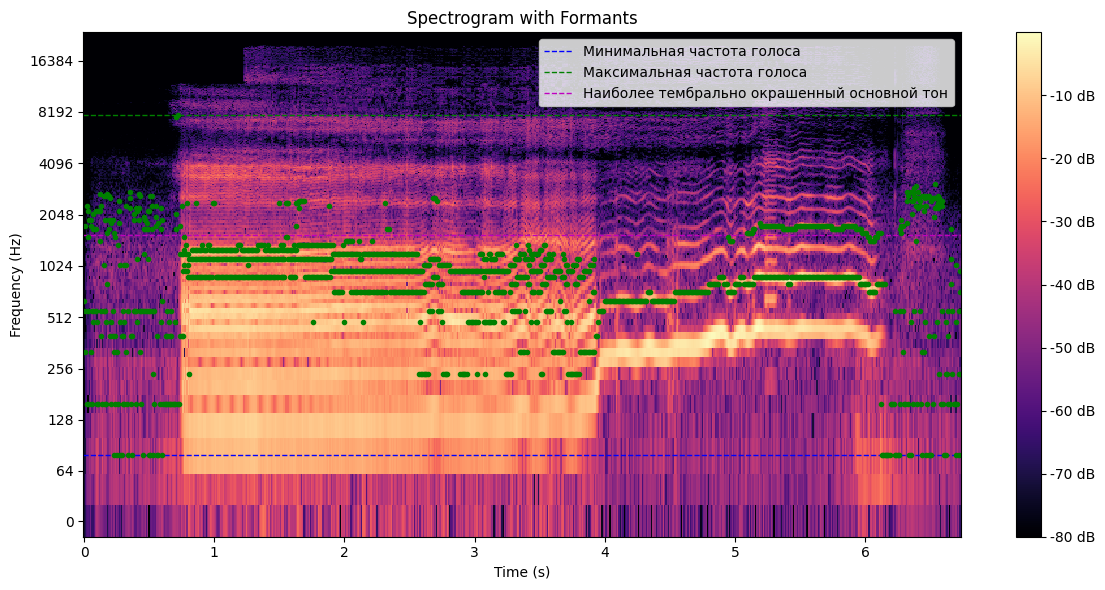

In [61]:
visualize_formants(a_sound)

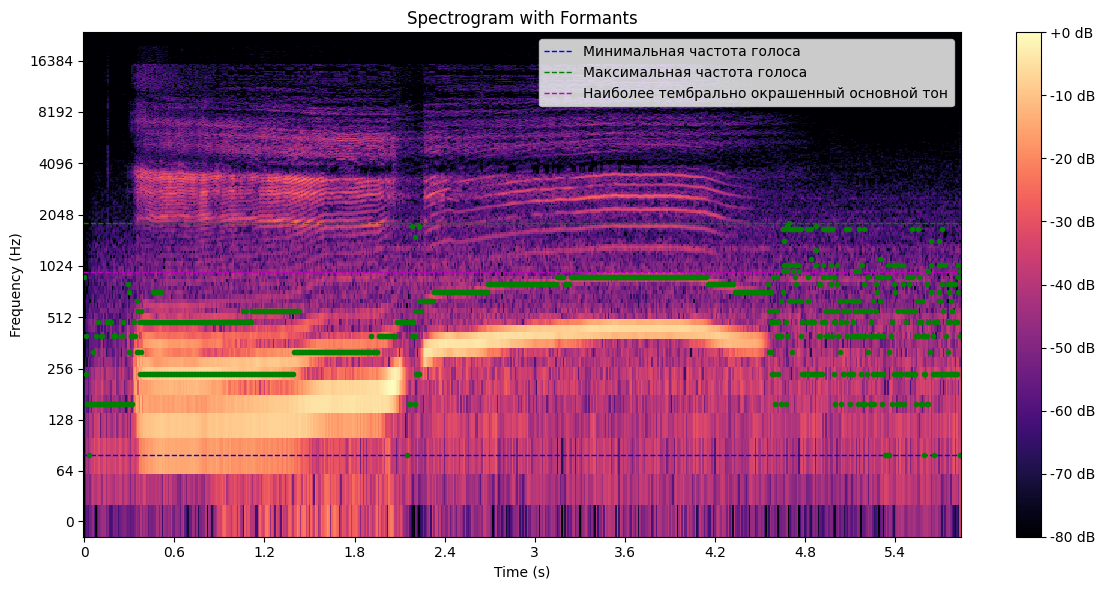

In [62]:
visualize_formants(i_sound)

/var/folders/mw/xhhythbx28sbxsn8v6htd5qc0000gn/T/ipykernel_49476/2319859135.py:66: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


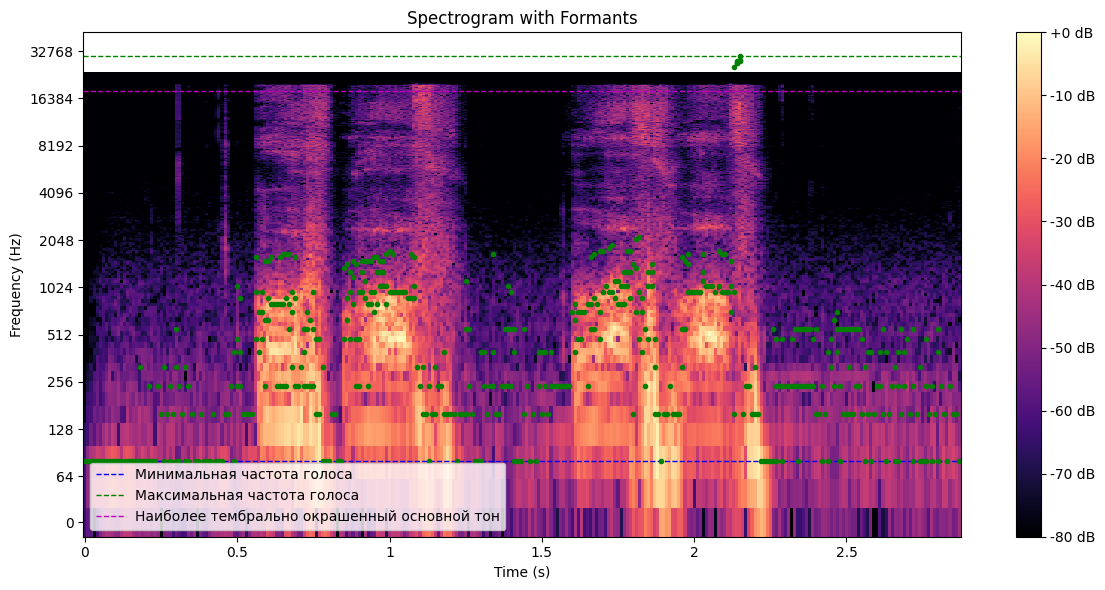

In [63]:
visualize_formants(gav_sound)